Sites relacionados ao dataset:

- https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed/notebook

- https://deepnote.com/@jayjburgess/Diabetes-A-Machine-Learning-Project-a197a45b-0037-4f40-a3e7-563a612b713a

- https://ieftimov.com/posts/knn-from-scratch-scikit-learn/


Livros:

- Ashwin Pajankar; Aditya Joshi, Hands-on Machine Learning with Python: Implement Neural Network Solutions with Scikit-learn and PyTorch, 2022

- ALEXEY GRIGOREV, Machine Learning Bookcamp, BUILD A PORTFOLIO OF REAL-LIFE PROJECTS, 2021


In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

sns.set()
%matplotlib inline


In [4]:
import warnings
warnings.filterwarnings('ignore')


# <font color=blue>Obtendo os dados</font>

Define the Problem: If data science, big data, machine learning, predictive analytics, business intelligence, or any other buzzword is the solution, then what is the problem? As the saying goes, don't put the cart before the horse. Problems before requirements, requirements before solutions, solutions before design, and design before technology. Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve.

- Gravidez: número de vezes que engravidou
- Glicose: concentração plasmática de glicose após 2 horas em um teste oral de tolerância à glicose
- Pressão arterial: pressão arterial diastólica (mm Hg)
- Espessura da pele: espessura da dobra da pele do tríceps (mm)
- Insulina: insulina sérica de 2 horas (mu U/ml)
- IMC: índice de massa corporal (peso em kg/(altura em m)^2)
- Tendência: função de pedigree do diabetes
- Idade: idade (anos)
- Classe: variável de classe (S ou N)

In [5]:
df = pd.read_csv('diabetes.csv')
df.head(20)

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade,Classe
0,6,148.0,NaN,35,0,33.6,0.627,50,S
1,1,85.0,66.0,29,0,26.6,0.351,31,N
2,8,183.0,64.0,0,0,23.3,0.672,32,S
3,1,89.0,66.0,23,94,28.1,0.167,21,N
4,0,137.0,40.0,35,168,43.1,2.288,33,S
5,5,116.0,74.0,0,0,25.6,0.201,30,N
6,3,78.0,50.0,32,88,31.0,0.248,26,S
7,10,115.0,0.0,0,0,35.3,0.134,29,N
8,2,197.0,70.0,45,543,30.5,0.158,53,S
9,8,125.0,96.0,0,0,0.0,0.232,54,S


In [6]:
resultados = pd.DataFrame(columns=['Técnica','Score'])

# <font color=blue>Primeiro Teste (sem tratamento de dados)</font>

In [7]:
#deep = True => mudanças não refletem no original
df_copy = df.copy(deep = True)

In [8]:
#Contagem da variáveis nulas
df_copy.isnull().sum()

Gravidez         0
Glicose          8
Pressao          7
EspessuraPele    0
Insulina         0
IMC              0
Tendencia        2
Idade            0
Classe           0
dtype: int64

In [9]:
#Apagando valores nulos (geram erro em alguns modelos)
df_copy = df_copy.dropna(subset=['Glicose'])
df_copy = df_copy.dropna(subset=['Pressao'])
df_copy = df_copy.dropna(subset=['Tendencia'])

In [10]:
#Separando as características e a variável target
X = df_copy.drop(['Classe'], axis=1)
y = df_copy['Classe']

In [11]:
#Separando os dados em 70% para treino e 30% para testes
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
#Treinando o modelo
modelo = KNeighborsClassifier(5)
modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
#Medindo a acurácia de treinamento e teste
print("Acurácia de treinamento=",modelo.score(X_train,y_train))
print("Acurácia de teste=",modelo.score(X_test,y_test))

Acurácia de treinamento= 0.7885714285714286
Acurácia de teste= 0.6902654867256637


In [14]:
result = {'Técnica':'KNN sem tratamento','Score':modelo.score(X_test,y_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Análise Exploratória</font>

Perform Exploratory Analysis: Anybody who has ever worked with data knows, garbage-in, garbage-out (GIGO). Therefore, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. In addition, data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.

A análise exploratória é a primeira parte do processo de construção de um modelo de machine learning. É nessa etapa que o cientista reconhece os dados, identifica as mudanças que precisam ser feitas. É uma etapa importante para determinar quais os tipos de limpezas/transformações serão necessárias, e principalmente, estabelecer a(s) técnicas que poderão ser usadas.

Tarefas que podem ser executadas (não são as únicas):
- Identificação do tamanho da base de dados
- Identificação dos tipos
- Cálculo de medidas estatísticas (média, moda, variância, máximo, minimo, quartis...)
- Contagem dos valores missing
- Identificação das classes dos valores categóricos
- Cálculo do balancemaneto (distribuição) das classes
- Cálculo da correlação das variáveis
- Identificação de outliers

The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

Correcting: Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.


Completing: There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. For this dataset, age will be imputed with the median, the cabin attribute will be dropped, and embark will be imputed with mode. Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.


Creating: Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.


Converting: Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

### **Tamanho da base de dados (linhas, colunas)**

In [15]:
df.shape

(768, 9)

### **Tipagem dos atributos**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gravidez       768 non-null    int64  
 1   Glicose        760 non-null    float64
 2   Pressao        761 non-null    float64
 3   EspessuraPele  768 non-null    int64  
 4   Insulina       768 non-null    int64  
 5   IMC            768 non-null    float64
 6   Tendencia      766 non-null    float64
 7   Idade          768 non-null    int64  
 8   Classe         768 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 54.1+ KB


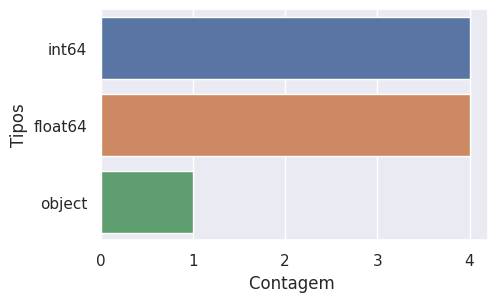

In [17]:
sns.set(rc = {'figure.figsize':(5, 3)})
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("Contagem ")
plt.ylabel("Tipos")
plt.show();

### **Medidas estatísticas**

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gravidez,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.0000,17.00
Glicose,760.0,121.031579,32.086002,0.000,99.00000,117.0000,141.0000,199.00
Pressao,761.0,69.110381,19.405735,0.000,64.00000,72.0000,80.0000,122.00
EspessuraPele,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.0000,99.00
Insulina,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.2500,846.00
IMC,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.6000,67.10
Tendencia,766.0,0.471496,0.331418,0.078,0.24325,0.3725,0.6255,2.42
Idade,768.0,33.407552,12.485373,21.000,24.00000,29.0000,41.0000,150.00


### **Verificando a distribuição da classes**

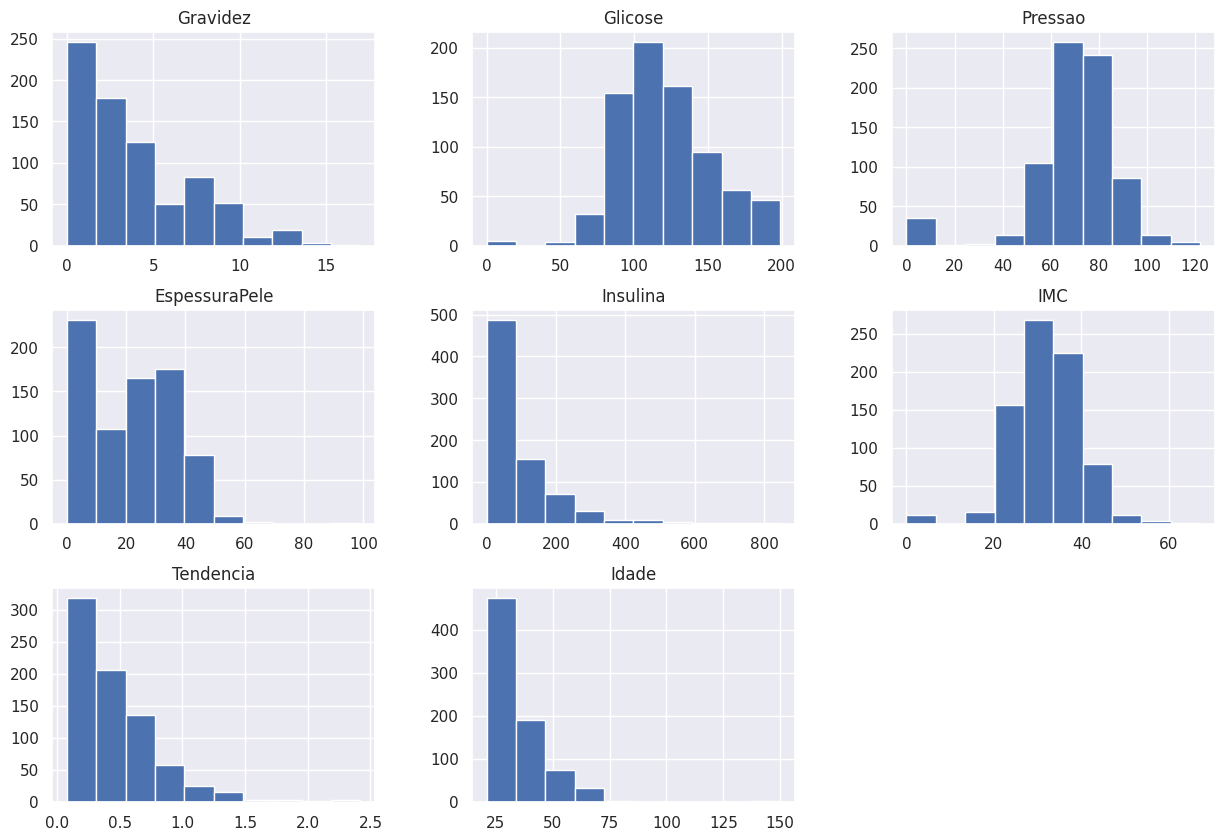

In [19]:
df.hist(figsize = (15,10));

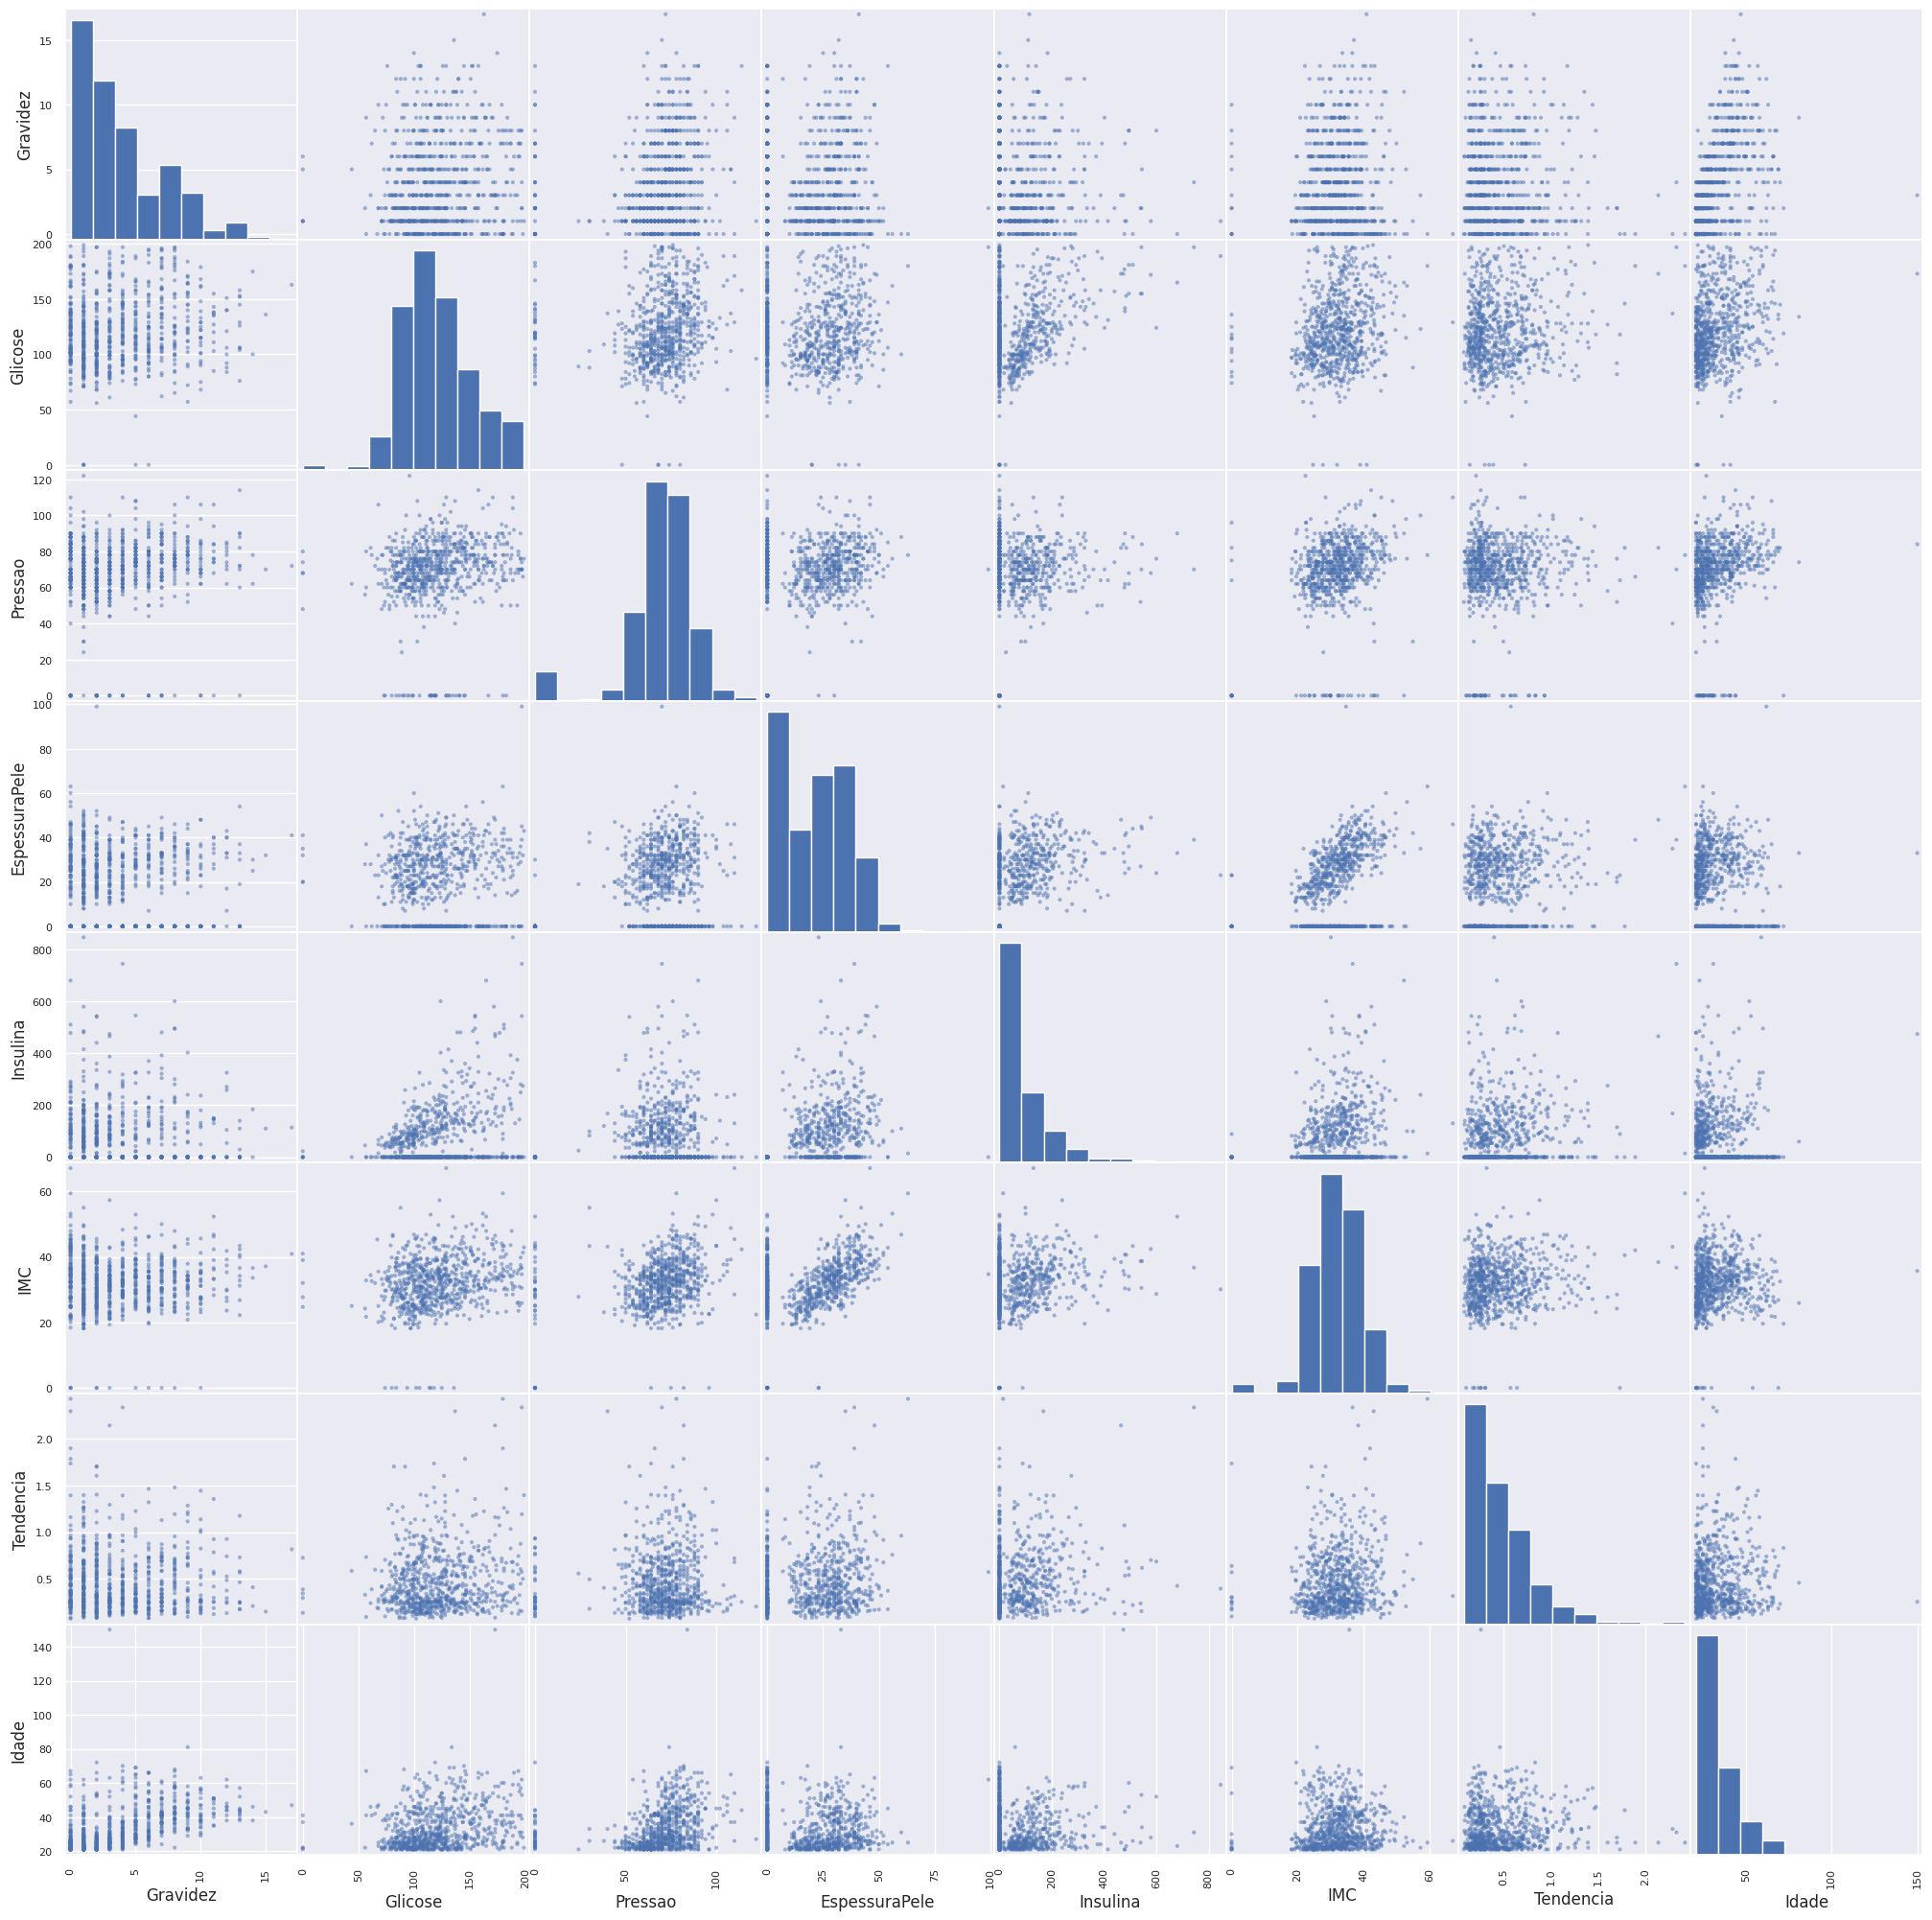

In [20]:
scatter_matrix(df,figsize=(25, 25));

N    500
S    268
Name: Classe, dtype: int64


<Axes: xlabel='Classe', ylabel='count'>

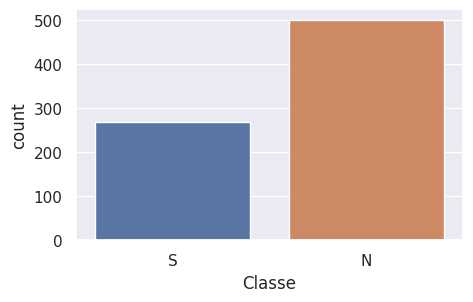

In [21]:
print(df['Classe'].value_counts())
sns.countplot(data=df, x='Classe')

### **Verificando valores missing**

https://github.com/ResidentMario/missingno

In [22]:
import missingno as msno

In [23]:
df.isnull().sum()

Gravidez         0
Glicose          8
Pressao          7
EspessuraPele    0
Insulina         0
IMC              0
Tendencia        2
Idade            0
Classe           0
dtype: int64

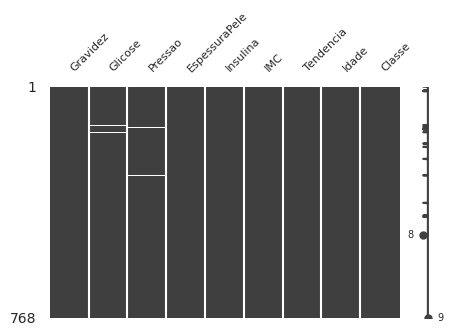

In [24]:
msno.matrix(df, figsize=(5,3), fontsize=8);


### **Identificação das classes dos valores categóricos**

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Gravidez, dtype: int64


<Axes: xlabel='Gravidez', ylabel='count'>

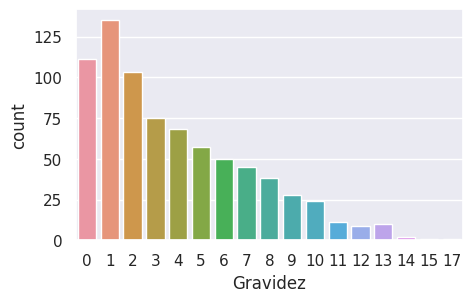

In [25]:
print(df['Gravidez'].unique())
print(df['Gravidez'].value_counts())
sns.countplot(data=df, x='Gravidez')

In [26]:
df['Glicose'].unique()

array([148.,  85., 183.,  89., 137., 116.,  78., 115., 197., 125., 110.,
       168., 139., 189., 166.,  nan, 118., 107., 103., 126.,  99., 196.,
       119., 143., 147.,  97., 145., 117., 109., 158.,  88.,  92., 122.,
       138., 102.,  90., 111., 180., 133., 106., 171., 159., 146.,  71.,
       105., 101., 176., 150.,  73., 187., 100.,  84.,  44., 141., 114.,
        95., 129.,  79.,   0.,  62., 131., 112., 113.,  74.,  83., 136.,
        80., 123.,  81., 134., 142., 144.,  93., 163., 151.,  96., 155.,
        76., 160., 124., 162., 132., 120., 173., 170., 108., 154.,  57.,
       156., 153., 188., 152., 104.,  87.,  75., 179., 130., 194., 181.,
       128., 135., 184., 140., 177., 164.,  91., 165.,  86., 193., 191.,
       161., 167.,  77., 182., 157., 178.,  61.,  98., 127.,  82.,  72.,
       172.,  94., 175., 195.,  68., 186., 198., 121.,  67., 174., 199.,
        56., 169., 149.,  65., 190.])

In [27]:
df['Pressao'].unique()

array([ nan,  66.,  64.,  40.,  74.,  50.,   0.,  70.,  96.,  92.,  80.,
        72.,  84.,  30.,  88.,  90.,  94.,  76.,  82.,  75.,  58.,  78.,
        60.,  68., 110.,  56.,  62.,  85.,  86.,  48.,  44.,  65., 108.,
        55., 122.,  54.,  52.,  98., 104.,  95.,  46., 102., 100.,  61.,
        24.,  38., 106., 114.])

In [28]:
df['EspessuraPele'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [29]:
df['Insulina'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [30]:
df['IMC'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [31]:
df['Tendencia'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [32]:
df['Idade'].unique()

array([ 50,  31,  32,  21,  33,  30,  26,  29,  53,  54,  34,  57,  59,
        51,  27,  41,  43,  22,  38,  60,  28,  45,  35,  46,  56,  37,
        48,  40,  25,  24,  58,  42,  44,  39,  36,  23,  61,  69,  62,
        55,  65,  47,  52,  66,  49,  63,  67, 150,  72,  81,  64,  70,
        68])

In [33]:
df[df['Glicose'] == 0 ]['Glicose'].count()

5

In [34]:
df[df['Pressao'] == 0 ]['Pressao'].count()

35

In [35]:
df[df['EspessuraPele'] == 0 ]['EspessuraPele'].count()

227

In [36]:
df[df['IMC'] == 0 ]['IMC'].count()

11

### **Correlação entre as variáveis**

https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a


- Correlação positiva — as características se movem na mesma direção
- Correlação negativa — as características se movem em direção oposta

In [37]:
df.corr()['Glicose'].sort_values(ascending=False)

Glicose          1.000000
Insulina         0.330140
Idade            0.270257
IMC              0.221729
Pressao          0.156256
Tendencia        0.136829
Gravidez         0.128715
EspessuraPele    0.057906
Name: Glicose, dtype: float64

In [38]:
df.corr()['Insulina'].sort_values(ascending=False)

Insulina         1.000000
EspessuraPele    0.436783
Glicose          0.330140
IMC              0.197859
Tendencia        0.186781
Pressao          0.094559
Idade            0.006006
Gravidez        -0.073535
Name: Insulina, dtype: float64

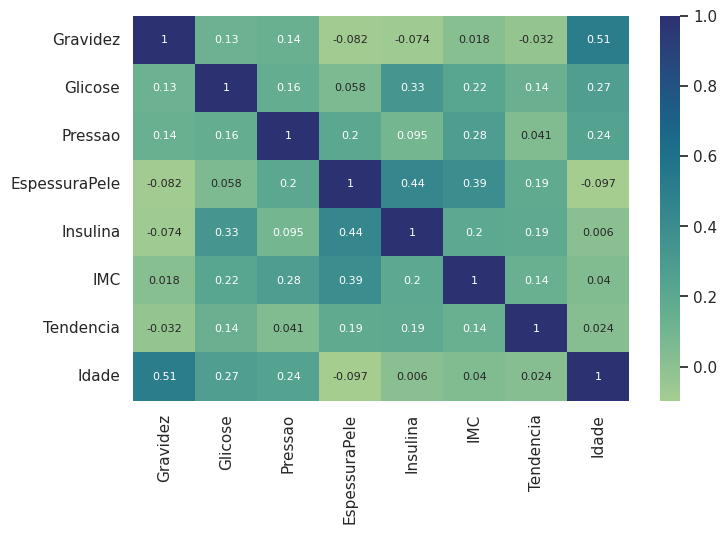

In [39]:
plt.figure(figsize=(8,5))
plt.rcParams["font.size"] = "8"
sns.heatmap(df.corr(), annot=True,cmap ='crest');

#sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn');
#sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

### **Identificação de outliers**

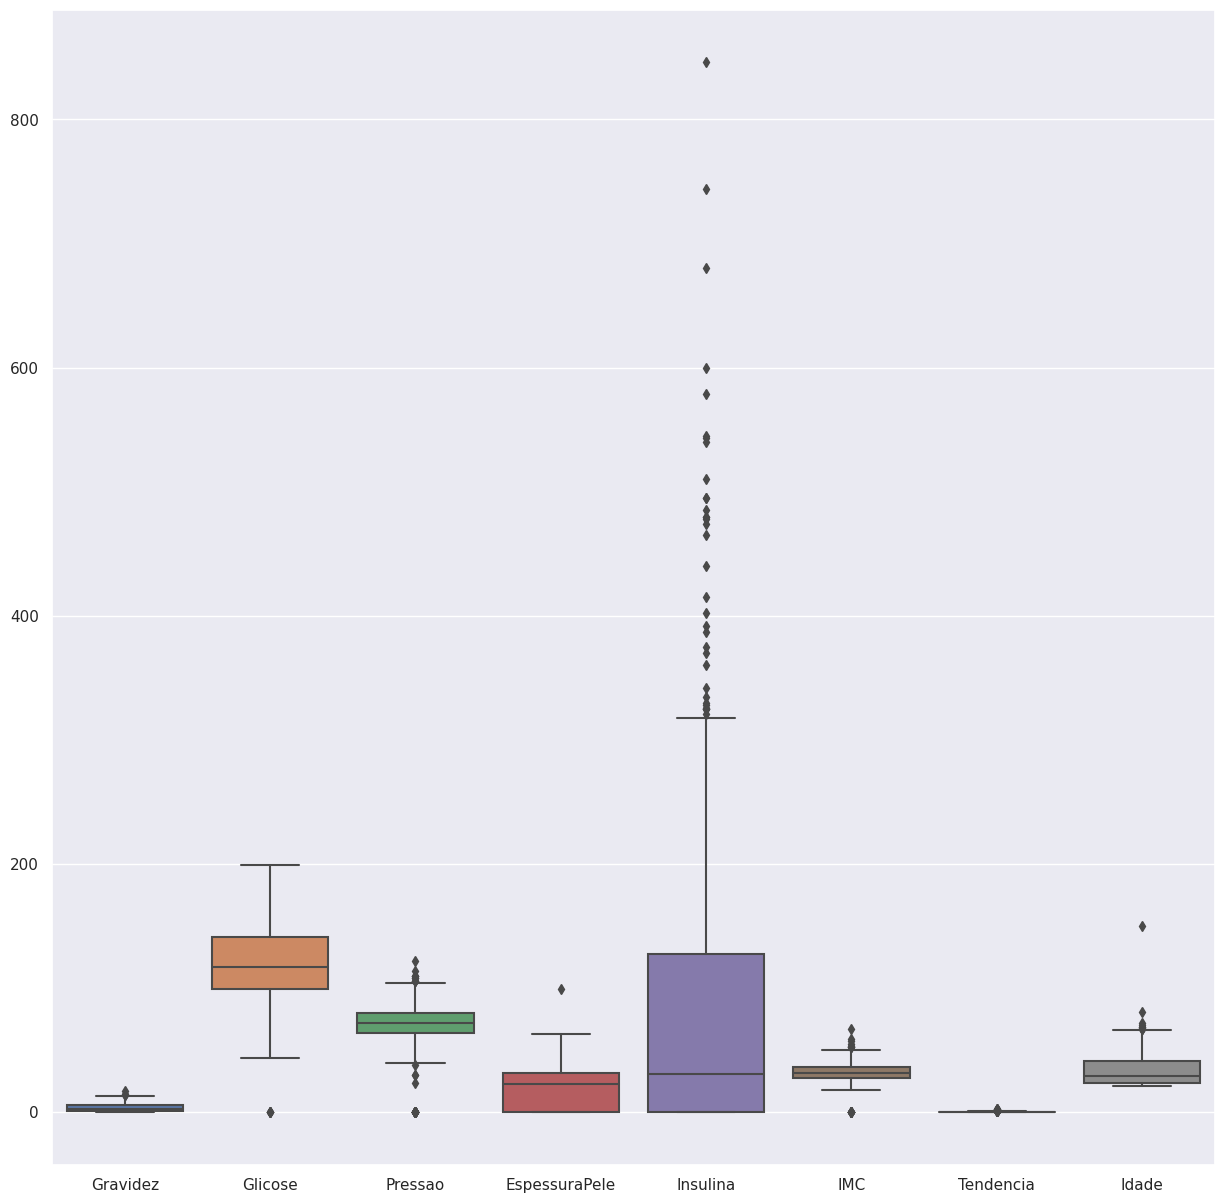

In [40]:
plt.figure(figsize=(15,15))
plt.rcParams["font.size"] = "8"
sns.boxplot(data=df);

# <font color=blue>Pré processamento: Limpeza, Transformação, Feature Engineering</font>

https://ateliware.com/blog/feature-engineering


Prepare Data for Consumption: This step is often referred to as data wrangling, a required process to turn “wild” data into “manageable” data. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.


O pré processamento é composto pela atividades importantes de ajustes dos dados para o padrão que o modelo a ser usado precisa, bem como ajustes para evitar overfiting/underfiting.

A limpeza consiste em retirar ou modificar dados considerados "inadequados", como valores missing, outliers, etc. A transformação é a adequação dos dados a padrões como separação de datas, normalização. Já a feauture engineering, que por vezes é até considerada como todo esse pré processamento, envolve também a criação de novos atributos, seleção de atributos importantes, aplicação de componentes principais, etc.

Existem algumas tarefas que podem ser usadas conforme necessidade e técnica:

- Tratamento dos valores missing, deleção/imputação
- Tratamento de outliers
- Binning (criação de intervalos) de conjunto de dados
- One-hot encoding dos valores categóricos
- Padronização ou normalização dos dados


In [41]:
df_copy = df.copy(deep = True)

### **Label encoding**

https://www.shiksha.com/online-courses/articles/one-hot-encoding-vs-label-encoding/

In [42]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.4 MB/s eta 0:00:00


In [43]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

LE = LabelEncoder()
df_copy['Classe'] = LE.fit_transform(df_copy['Classe'])
df_copy.head()

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade,Classe
0,6,148.0,NaN,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


### **Deleção das linhas dos registros zerados e nulos da Glicose, Pressão e Tendência**

In [44]:
df_copy = df_copy.drop(df_copy[df_copy['Glicose'] == 0].index)
df_copy = df_copy.dropna(subset=['Glicose'])

In [45]:
df_copy = df_copy.drop(df_copy[df_copy['Pressao'] == 0].index)
df_copy = df_copy.dropna(subset=['Pressao'])

In [46]:
df_copy = df_copy.dropna(subset=['Tendencia'])

### **Substituição dos valores zero por NULL**


In [47]:
df_copy[['Pressao','EspessuraPele','Insulina','IMC']] = df_copy[['Pressao',
                                                                 'EspessuraPele','Insulina',
                                                                 'IMC']].replace(0,np.NaN)

In [48]:
df_copy.isnull().sum()

Gravidez           0
Glicose            0
Pressao            0
EspessuraPele    191
Insulina         327
IMC                4
Tendencia          0
Idade              0
Classe             0
dtype: int64

In [49]:
df_copy['EspessuraPele'].unique()

array([29., nan, 23., 35., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

### **Imputação de dados**


https://dev.to/franciscojdsjr/tratamento-de-dados-nulos-no-pandas-uma-abordagem-completa-e-detalhada-41n1

In [50]:
df_copy['EspessuraPele'].fillna(df_copy['EspessuraPele'].median(), inplace = True)
df_copy['Insulina'].fillna(df_copy['Insulina'].median(), inplace = True)
df_copy['IMC'].fillna(df_copy['IMC'].median(), inplace = True)

In [51]:
df_copy.isnull().sum()

Gravidez         0
Glicose          0
Pressao          0
EspessuraPele    0
Insulina         0
IMC              0
Tendencia        0
Idade            0
Classe           0
dtype: int64

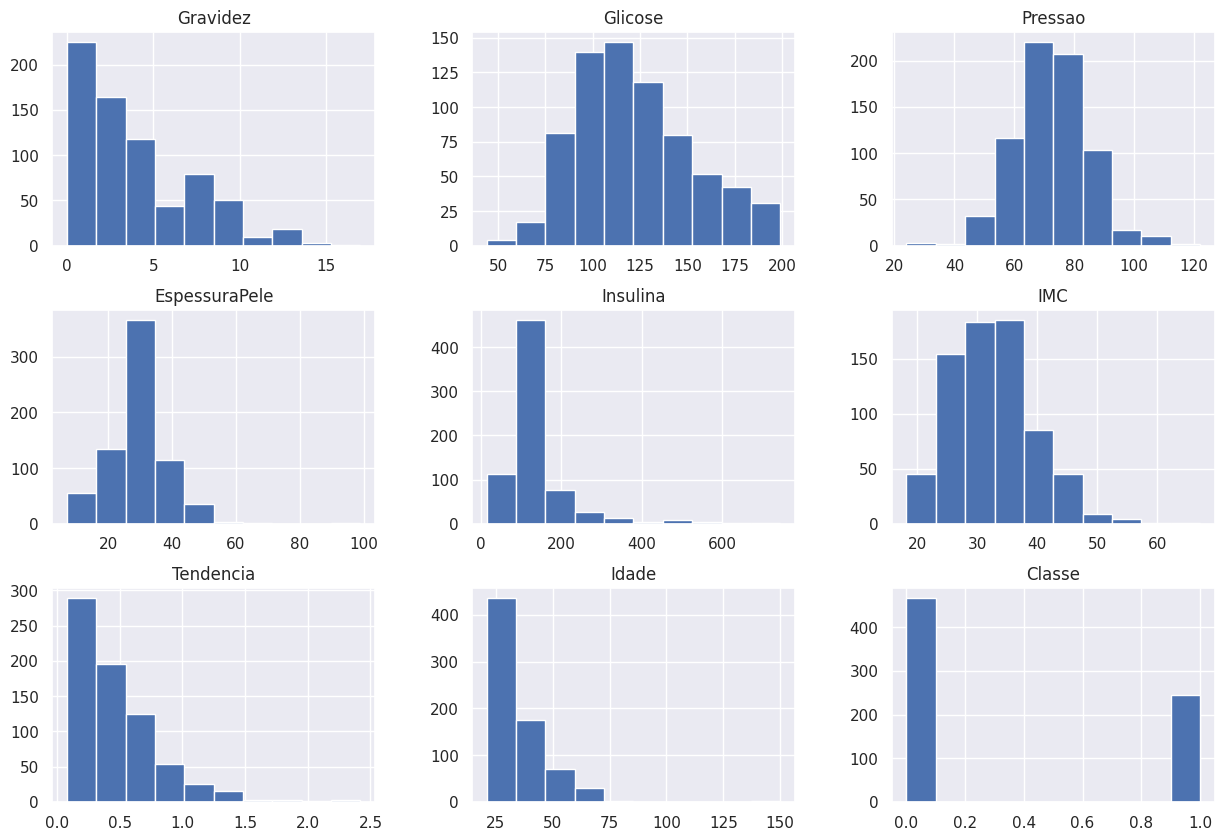

In [52]:
df_copy.hist(figsize = (15,10));

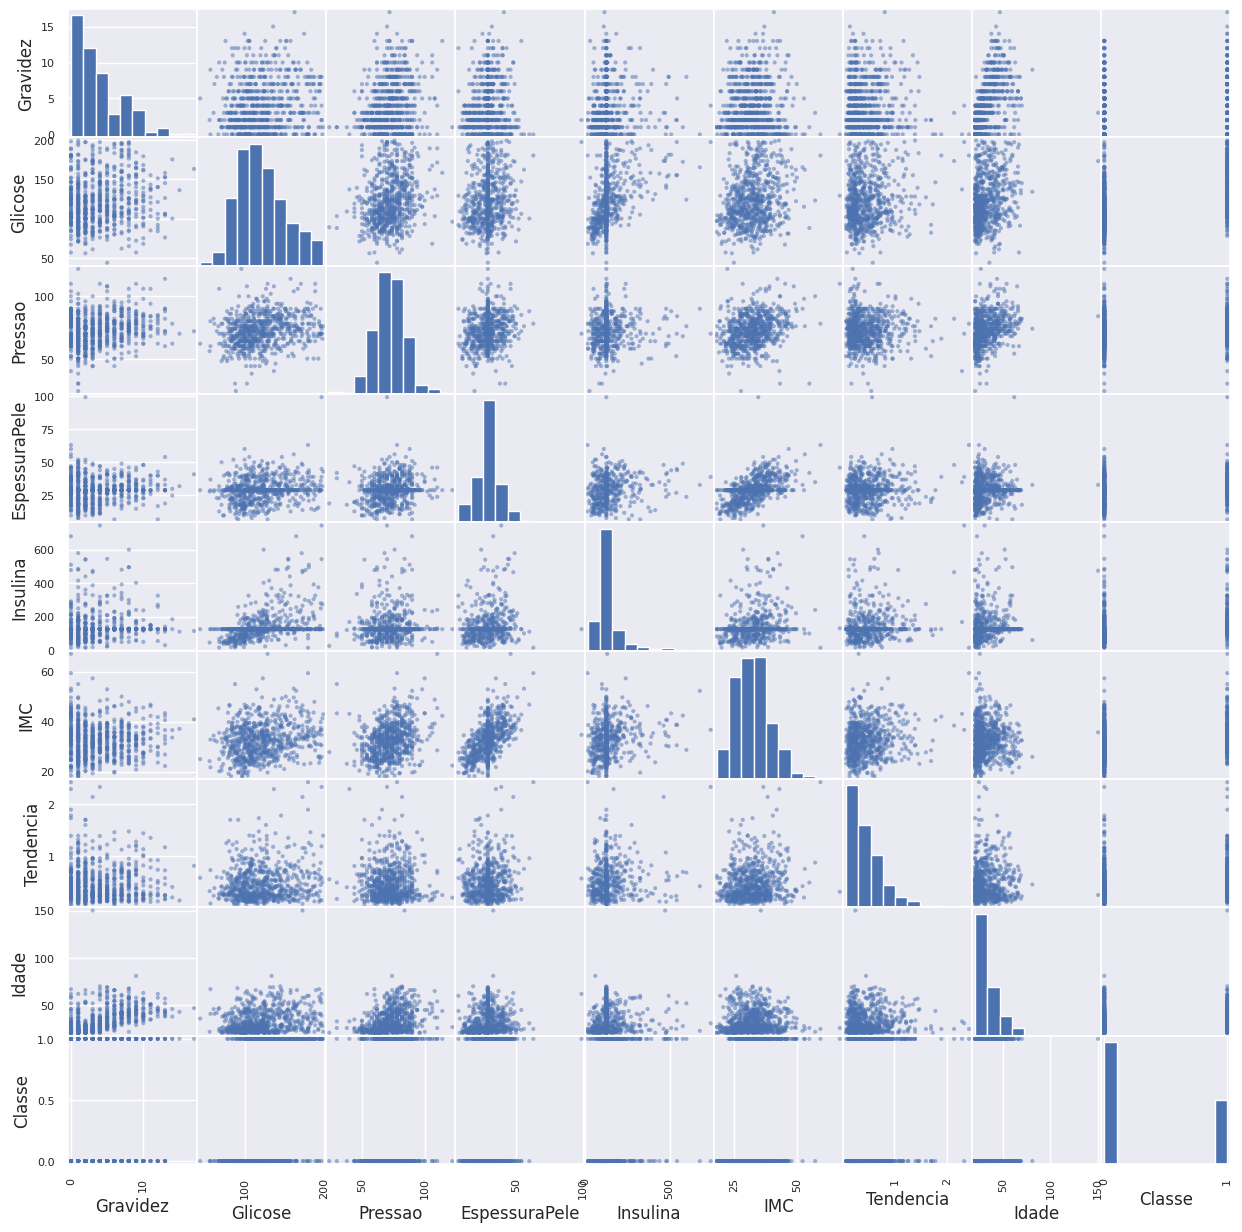

In [53]:

scatter_matrix(df_copy,figsize=(15, 15));

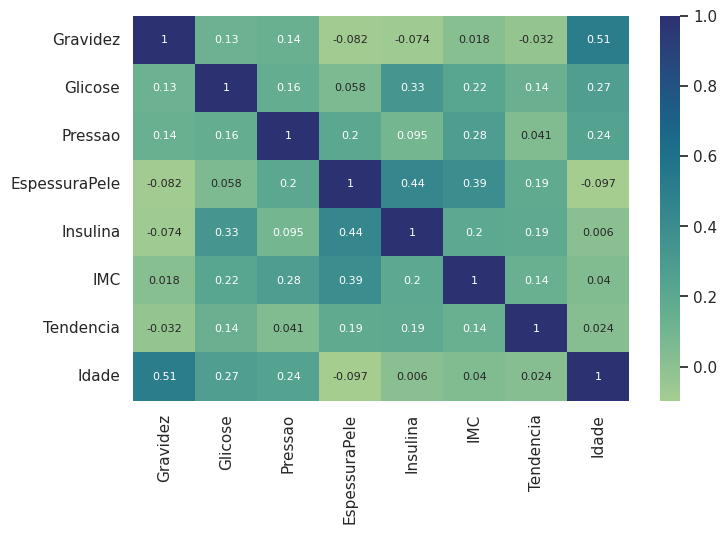

In [54]:
plt.figure(figsize=(8,5))
plt.rcParams["font.size"] = "8"
sns.heatmap(df.corr(), annot=True,cmap ='crest');

### **Remoção dos outliers**


https://medium.com/@lucapqg/como-detectar-e-tratar-outliers-com-python-ca2cf088c160

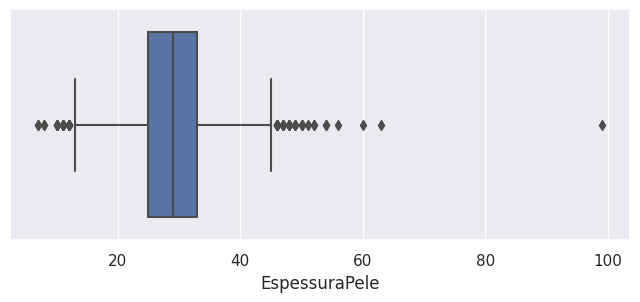

In [55]:
plt.figure(figsize=(8,3))
plt.rcParams["font.size"] = "8"
sns.boxplot(data=df_copy, x='EspessuraPele');

In [56]:
Q1 = df_copy['EspessuraPele'].quantile(0.25)
Q3 = df_copy['EspessuraPele'].quantile(0.75)
IQR = Q3 - Q1

Q1 = Q1 - 1.5 * IQR
Q3 = Q3 + 1.5 * IQR

In [57]:
df_copy[((df_copy['EspessuraPele'] < Q1) | (df_copy['EspessuraPele'] > Q3))]

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade,Classe
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22,0
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
50,1,103.0,80.0,11.0,82.0,19.4,0.491,22,0
55,1,73.0,50.0,10.0,125.0,23.0,0.248,21,0
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
86,13,106.0,72.0,54.0,125.0,36.6,0.178,45,0
99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
150,1,136.0,74.0,50.0,204.0,37.4,0.399,24,0


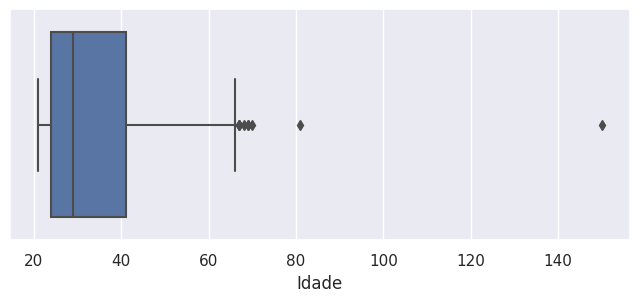

In [58]:
plt.figure(figsize=(8,3))
plt.rcParams["font.size"] = "8"
sns.boxplot(data=df_copy, x='Idade');

In [59]:
Q1 = df_copy['Idade'].quantile(0.25)
Q3 = df_copy['Idade'].quantile(0.75)
IQR = Q3 - Q1

Q1 = Q1 - 1.5 * IQR
Q3 = Q3 + 1.5 * IQR

In [60]:
df_copy[((df_copy['Idade'] < Q1) | (df_copy['Idade'] > Q3))]

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade,Classe
123,5,132.0,80.0,29.0,125.0,26.8,0.186,69,0
363,4,146.0,78.0,29.0,125.0,38.5,0.520,67,1
415,3,173.0,84.0,33.0,474.0,35.7,0.258,150,1
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194.0,80.0,29.0,125.0,26.1,0.551,67,0
537,0,57.0,60.0,29.0,125.0,21.7,0.735,67,0
666,4,145.0,82.0,18.0,125.0,32.5,0.235,70,1
674,8,91.0,82.0,29.0,125.0,35.6,0.587,68,0
684,5,136.0,82.0,29.0,125.0,32.4,0.640,69,0


In [61]:
df_copy = df_copy.drop(df_copy[df_copy['Idade'] == 150].index)

In [62]:
df_copy[((df_copy['Idade'] < Q1) | (df_copy['Idade'] > Q3))]

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade,Classe
123,5,132.0,80.0,29.0,125.0,26.8,0.186,69,0
363,4,146.0,78.0,29.0,125.0,38.5,0.520,67,1
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194.0,80.0,29.0,125.0,26.1,0.551,67,0
537,0,57.0,60.0,29.0,125.0,21.7,0.735,67,0
666,4,145.0,82.0,18.0,125.0,32.5,0.235,70,1
674,8,91.0,82.0,29.0,125.0,35.6,0.587,68,0
684,5,136.0,82.0,29.0,125.0,32.4,0.640,69,0


### **Binning das variáveis**


https://ecoagi.ai/pt/topics/Python/python-binning

In [63]:
df_copy['Idade2'] = pd.qcut(df_copy['Idade'], q=[0,1/3,2/3,1], labels=['Jovem', 'Adulto', 'Idoso'])
df_copy.head()

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade,Classe,Idade2
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Adulto
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Adulto
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Jovem
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Adulto
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,Adulto


In [64]:
df_copy.drop('Idade', axis=1, inplace=True)
df_copy.rename(columns={"Idade2": "Idade"}, inplace=True)
df_copy.head()

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Classe,Idade
1,1,85.0,66.0,29.0,125.0,26.6,0.351,0,Adulto
2,8,183.0,64.0,29.0,125.0,23.3,0.672,1,Adulto
3,1,89.0,66.0,23.0,94.0,28.1,0.167,0,Jovem
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,Adulto
5,5,116.0,74.0,29.0,125.0,25.6,0.201,0,Adulto


### **One-hot encoding dos valores categóricos**

https://www.educative.io/blog/one-hot-encoding


Os modelo de Machine Learning normalmente trabalham com valores numéricos e não categóricos, é boa prática transformar valores textuais (se possível) para padrões numéricos. Um variável como sexo (F,M) poderia ser codificada para sexo (0,1).

No entanto, as variáveis categóricas dependendo dos seus valores podem influenciar o resultado do modelo. Por exemplo, sexo poderia ser codificado com valores 0 e 1, mas talvez o algoritmo entenderia os registros com 1 como mais importantes do que os registros com 0, gerando viés.



In [65]:
one_hot_encoded_data = pd.get_dummies(df_copy, columns = ['Idade'])
df_copy = pd.DataFrame(one_hot_encoded_data)
df_copy.head()

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Classe,Idade_Jovem,Idade_Adulto,Idade_Idoso
1,1,85.0,66.0,29.0,125.0,26.6,0.351,0,0,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,1,0,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,0,1,0
5,5,116.0,74.0,29.0,125.0,25.6,0.201,0,0,1,0


In [66]:
df_copy.head()

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Classe,Idade_Jovem,Idade_Adulto,Idade_Idoso
1,1,85.0,66.0,29.0,125.0,26.6,0.351,0,0,1,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,1,0,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,0,1,0
5,5,116.0,74.0,29.0,125.0,25.6,0.201,0,0,1,0


### **Padronização dos dados**

https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [68]:
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(df_copy.drop(["Classe"],axis = 1),),
        columns=['Gravidez', 'Glicose', 'Pressao',
                 'EspessuraPele', 'Insulina','IMC',
                 'Tendencia', 'Idade_Jovem',
                 'Idade_Adulto', 'Idade_Idoso'])
y = df_copy['Classe']

In [69]:
X.head()

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade_Jovem,Idade_Adulto,Idade_Idoso
0,-0.856805,-1.198850,-0.519807,-0.017962,-0.186604,-0.859338,-0.374718,-0.725087,1.450794,-0.707107
1,1.214258,1.996646,-0.681409,-0.017962,-0.186604,-1.338591,0.577041,-0.725087,1.450794,-0.707107
2,-0.856805,-1.068422,-0.519807,-0.684262,-0.553797,-0.641496,-0.920274,1.379145,-0.689278,-0.707107
3,-1.152671,0.496719,-2.620628,0.648338,0.322729,1.536927,5.368451,-0.725087,1.450794,-0.707107
4,0.326660,-0.188030,0.126599,-0.017962,-0.186604,-1.004567,-0.819465,-0.725087,1.450794,-0.707107


### **Normalização dos dados**

In [70]:
sc = MinMaxScaler ()
X =  pd.DataFrame(sc.fit_transform(df_copy.drop(["Classe"],axis = 1),),
        columns=['Gravidez', 'Glicose', 'Pressao',
                 'EspessuraPele', 'Insulina','IMC',
                 'Tendencia', 'Idade_Jovem',
                 'Idade_Adulto', 'Idade_Idoso'])
y = df_copy['Classe']

In [71]:
X.head()

,Gravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Tendencia,Idade_Jovem,Idade_Adulto,Idade_Idoso
0,0.058824,0.264516,0.428571,0.239130,0.152055,0.171779,0.116567,0.0,1.0,0.0
1,0.470588,0.896774,0.408163,0.239130,0.152055,0.104294,0.253629,0.0,1.0,0.0
2,0.058824,0.290323,0.428571,0.173913,0.109589,0.202454,0.038002,1.0,0.0,0.0
3,0.000000,0.600000,0.163265,0.304348,0.210959,0.509202,0.943638,0.0,1.0,0.0
4,0.294118,0.464516,0.510204,0.239130,0.152055,0.151329,0.052519,0.0,1.0,0.0


# <font color=blue>Treinando o modelo</font>

Model Data: Like descriptive and inferential statistics, data modeling can either summarize the data or predict future outcomes. Your dataset and expected results, will determine the algorithms available for use. It's important to remember, algorithms are tools and not magical wands or silver bullets. You must still be the master craft (wo)man that knows how-to select the right tool for the job. An analogy would be asking someone to hand you a Philip screwdriver, and they hand you a flathead screwdriver or worst a hammer. At best, it shows a complete lack of understanding. At worst, it makes completing the project impossible. The same is true in data modelling. The wrong model can lead to poor performance at best and the wrong conclusion (that’s used as actionable intelligence) at worst.

### **Separando dados em treino e teste**

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)



# <font color=blue>K-Nearest Neighbors (KNN)</font>
Armazena todo os casos e classifica os novo usado o voto majoritário dos k vizinhos (classe mais comum)

### **Treinando o modelo com dados otimizados**

In [73]:
modelo = KNeighborsClassifier(5)
modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
print("Acurácia de treinamento=",modelo.score(X_train,y_train))
print("Acurácia de teste=",modelo.score(X_test,y_test))

Acurácia de treinamento= 0.8249496981891348
Acurácia de teste= 0.705607476635514


In [75]:
result = {'Técnica':'KNN com tratamento','Score':modelo.score(X_test,y_test)}
resultados = resultados.append(result, ignore_index=True)

### **Encontrando o melhor k (Método Elbow)**

In [76]:
from sklearn.model_selection import cross_val_score

Avaliar o score por cross-validation.

In [77]:
accuracy_rate = []
for i in range(1,15):
    modelo = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(modelo, X, y, cv=10)
    accuracy_rate.append(score.mean())

error_rate = []
for i in range(1,15):
    modelo = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(modelo, X, y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Taxa de erro')

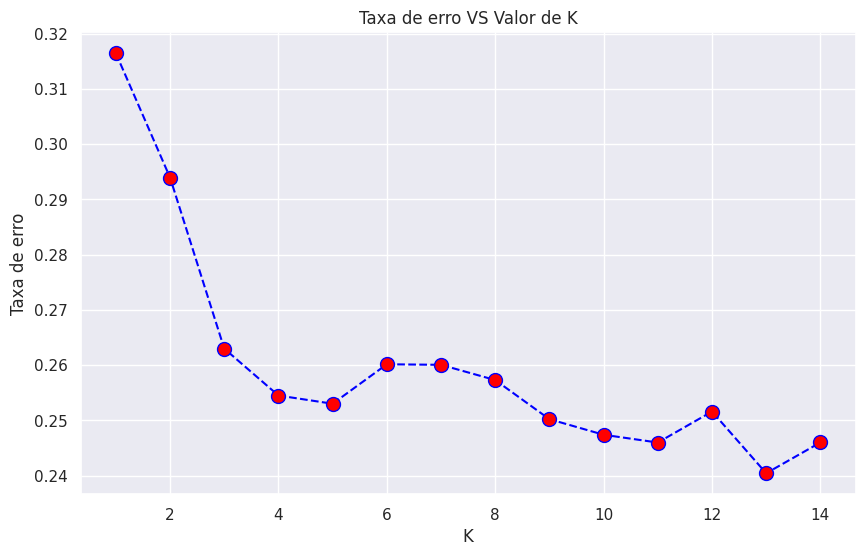

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Taxa de erro VS Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de erro')

### **Treinando o modelo com o melhor K**

In [79]:
modelo = KNeighborsClassifier(4)
modelo.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [80]:
print("Acurácia de treinamento=",modelo.score(X_train,y_train))
print("Acurácia de teste=",modelo.score(X_test,y_test))

Acurácia de treinamento= 0.8350100603621731
Acurácia de teste= 0.7570093457943925


In [81]:
result = {'Técnica':'KNN com tratamento melhor k','Score':modelo.score(X_test,y_test)}
resultados = resultados.append(result, ignore_index=True)

### **Aplicando o modelo treinado a base de testes e verificando as métricas**


Validate and Implement Data Model: After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our model overfit, generalize, or underfit our dataset.

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [83]:
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [84]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.8350100603621731
Acurácia de teste= 0.7570093457943925


In [85]:
confusion_matrix(y_test,y_pred_test)

array([[127,  23],
       [ 29,  35]])

Text(28.75, 0.5, 'Classe atual')

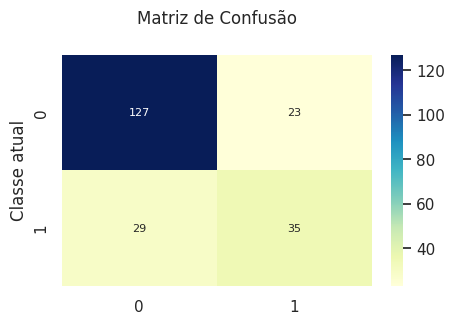

In [86]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Classe atual')
#plt.xlabel('Classe prevista')

In [87]:
# https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec
# https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.60      0.55      0.57        64

    accuracy                           0.76       214
   macro avg       0.71      0.70      0.70       214
weighted avg       0.75      0.76      0.75       214



predict_proba(): probabilidade da entrada pertencer a cada categoria

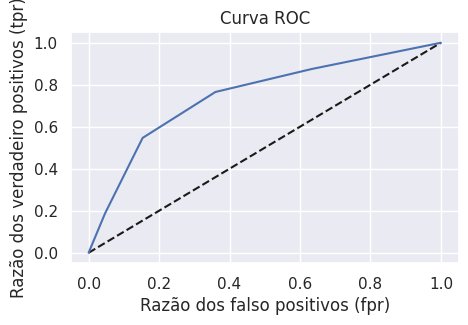

In [88]:
y_pred_proba = modelo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('Razão dos falso positivos (fpr)')
plt.ylabel('Razão dos verdadeiro positivos (tpr)')
plt.title('Curva ROC')
plt.show()

In [89]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.7471354166666666

# <font color=blue>Otimização de hiperparâmetros</font>

https://www.thiagocarmonunes.com.br/artigos/HyperParOptim/Teoria/

https://databasecamp.de/en/ml/hyperparameter-tuning-en

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {'n_neighbors':np.arange(1,30)}
modelo = KNeighborsClassifier()
modelo_cv= GridSearchCV(modelo,param_grid,cv=5)
modelo_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [92]:
print("Melhor Score:" + str(modelo_cv.best_score_))
print("Melhor parâmetros: " + str(modelo_cv.best_params_))

Melhor Score:0.7735743130109327
Melhor parâmetros: {'n_neighbors': 19}


In [93]:
result = {'Técnica':'KNN com tratamento otimizado','Score':modelo_cv.best_score_}
resultados = resultados.append(result, ignore_index=True)

In [94]:
sc.inverse_transform(X)

array([[  1.,  85.,  66., ...,   0.,   1.,   0.],
       [  8., 183.,  64., ...,   0.,   1.,   0.],
       [  1.,  89.,  66., ...,   1.,   0.,   0.],
       ...,
       [  5., 121.,  72., ...,   0.,   1.,   0.],
       [  1., 126.,  60., ...,   0.,   0.,   1.],
       [  1.,  93.,  70., ...,   1.,   0.,   0.]])

### **Salvando o modelo**

https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle



In [95]:
import pickle
pickle.dump(modelo_cv, open('model.pkl', 'wb'))


### **Testando com novos dados**

In [96]:
#Gravidez	Glicose	Pressao	EspessuraPele	Insulina	IMC	Tendencia	Idade_Jovem	Idade_Adulto	Idade_Idoso
test = [[1,93.0,89.0,39.0,50.0,26.6,0.351,0,1,0]]
test = sc.fit_transform(test)
test = np.array(test)

modelo_cv2 = pickle.load(open('model.pkl', 'rb'))
modelo_cv2.predict(test)


array([0])

# <font color=blue>Árvore de decisão</font>

Algoritmo que divide os dados em dois ou mais conjuntos homogêneos, baseado em atribuitos/variáveis independestes. Funciona para variáveis categóricas e contínuas


In [97]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [98]:
modelo = DecisionTreeClassifier()
modelo = modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [99]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 1.0
Acurácia de teste= 0.6682242990654206


In [100]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[102  48]
 [ 23  41]]
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       150
           1       0.46      0.64      0.54        64

    accuracy                           0.67       214
   macro avg       0.64      0.66      0.64       214
weighted avg       0.71      0.67      0.68       214



In [101]:
result = {'Técnica':'Árvore de Decisão','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Random Forest (Métodos Ensemble)</font>

Produz uma coleção de árvores (florestas) e usa um sistema de votação para escolha da melhor solução.

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
modelo = RandomForestClassifier()
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [104]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 1.0
Acurácia de teste= 0.7616822429906542


In [105]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[120  30]
 [ 21  43]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       150
           1       0.59      0.67      0.63        64

    accuracy                           0.76       214
   macro avg       0.72      0.74      0.73       214
weighted avg       0.77      0.76      0.77       214



In [106]:
#Importância de cada feature
modelo.feature_importances_

array([0.09848879, 0.26261141, 0.10495006, 0.07660217, 0.08454536,
       0.16938772, 0.13043556, 0.04483379, 0.01074447, 0.01740066])

In [107]:
result = {'Técnica':'Random Forest','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>ExtraTreesClassifier </font>

In [108]:
from sklearn.tree import ExtraTreeClassifier

In [109]:
modelo = ExtraTreeClassifier()
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [110]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 1.0
Acurácia de teste= 0.6121495327102804


In [111]:
result = {'Técnica':'ExtraTrees','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Bagging</font>
Bagging é um meta-estimador que cria classificadores básicos, cada um em subconjuntos aleatórios do conjunto de dados original e, em seguida, agrega suas previsões individuais (por votação ou cálculo da média) para formar uma previsão final.

In [112]:
from sklearn.ensemble import BaggingClassifier

In [113]:
modelo = BaggingClassifier()
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [114]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.9758551307847082
Acurácia de teste= 0.7429906542056075


In [115]:
result = {'Técnica':'Bagging','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>AdaBoostClassifier</font>

AdaBoost é um  meta-estimator que começa ajustando um classificador no conjunto de dados original e, em seguida, ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados de modo que os classificadores subsequentes se concentrem mais em casos difíceis.




In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [117]:
modelo = AdaBoostClassifier()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [118]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.8269617706237424
Acurácia de teste= 0.7242990654205608


In [119]:
result = {'Técnica':'AdaBoost','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Gradient Boosting (GBM)</font>

In [120]:
from sklearn.ensemble import GradientBoostingClassifier


In [121]:
modelo = GradientBoostingClassifier()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [122]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.9436619718309859
Acurácia de teste= 0.7336448598130841


In [123]:
result = {'Técnica':'Gradient Boosting','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>XGBoost</font>


In [124]:
from xgboost import XGBClassifier

In [125]:
modelo = XGBClassifier(random_state=0)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [126]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 1.0
Acurácia de teste= 0.7149532710280374


In [127]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[116  34]
 [ 27  37]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       150
           1       0.52      0.58      0.55        64

    accuracy                           0.71       214
   macro avg       0.67      0.68      0.67       214
weighted avg       0.72      0.71      0.72       214



In [128]:
result = {'Técnica':'XGBoost','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Regressão Logística</font>

Estima valores discretos (binários) baseado em um conjunto de variáveis independentes e a probabilidade de ocorrência. Usa uma função de probabilidade chamada Logit

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
modelo = LogisticRegression()
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)


In [131]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.7766599597585513
Acurácia de teste= 0.7757009345794392


In [132]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[126  24]
 [ 24  40]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       150
           1       0.62      0.62      0.62        64

    accuracy                           0.78       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.78      0.78      0.78       214



In [133]:
result = {'Técnica':'Regressão Logística','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Naive Bayes</font>

Baseada no teorema de Bayes que assume a independencia entre a variáveis. Um classificador considera que todos os atributos contibuem de forma independente para a probalidade de um resultado.

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
# Naive Bayes

modelo = GaussianNB()
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [136]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.7344064386317908
Acurácia de teste= 0.7429906542056075


In [137]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[112  38]
 [ 17  47]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       150
           1       0.55      0.73      0.63        64

    accuracy                           0.74       214
   macro avg       0.71      0.74      0.72       214
weighted avg       0.77      0.74      0.75       214



In [138]:
result = {'Técnica':'Naive Bayes','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Suport Vector Machine</font>

Cada ponto é plotado em um espaço n-dimensional (n é o numero de atributos)


In [139]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

In [140]:

modelo = SVC()
#modelo = LinearSVC()
#modelo = NuSVC()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.7907444668008048
Acurácia de teste= 0.7897196261682243


In [141]:
result = {'Técnica':'SVM','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Passive Aggressive Classifier</font>


In [142]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [143]:
modelo = PassiveAggressiveClassifier()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)


In [144]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.704225352112676
Acurácia de teste= 0.6121495327102804


In [145]:
result = {'Técnica':'Passive Aggressive','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

# <font color=blue>Redes Neurais</font>

### **MLPClassifier**

In [146]:
from sklearn.neural_network import MLPClassifier

In [147]:
modelo = MLPClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [148]:
print("Acurácia de treinamento=",accuracy_score(y_train,y_pred_train))
print("Acurácia de teste=",accuracy_score(y_test,y_pred_test))

Acurácia de treinamento= 0.7706237424547284
Acurácia de teste= 0.7710280373831776


In [149]:
result = {'Técnica':'Rede Neural MLPClassifier','Score':accuracy_score(y_test,y_pred_test)}
resultados = resultados.append(result, ignore_index=True)

In [150]:
resultados.sort_values(by=['Score'])

,Técnica,Score
6,ExtraTrees,0.612150
14,Passive Aggressive,0.612150
4,Árvore de Decisão,0.668224
0,KNN sem tratamento,0.690265
1,KNN com tratamento,0.705607
10,XGBoost,0.714953
8,AdaBoost,0.724299
9,Gradient Boosting,0.733645
7,Bagging,0.742991
12,Naive Bayes,0.742991


# Otimizando os testes iniciais

- https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook



CV is basically a shortcut to split and score our model multiple times, so we can get an idea of how well it will perform on unseen data. It’s a little more expensive in computer processing, but it's important so we don't gain false confidence. This is helpful in a Kaggle Competition or any use case where consistency matters and surprises should be avoided.

In addition to CV, we used a customized sklearn train test splitter, to allow a little more randomness in our test scoring. Below is an image of the default CV split.

In [151]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn import model_selection

modelos = [
    #Metodos Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),

    #GLM
    LogisticRegression(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),

    #Navies Bayes
    BernoulliNB(),
    GaussianNB(),

    #Nearest Neighbor
    KNeighborsClassifier(),

    #SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),

    #Trees
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),

    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    #Neural Network
    MLPClassifier()
    ]

#Split dataset usando validação cruzada
#Roda o modelo 10x com uma divisão de 60/30 deixando de lado 10%
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

columns = ['Técnica', 'Hiperparâmetros','Acurácia Treino', 'Acurácia Teste', 'Acurácia Teste 3*STD' ,'Tempo']
resultado = pd.DataFrame(columns = columns)

row_index = 0
for model in modelos:
    tecnica = model.__class__.__name__

    cv_results = model_selection.cross_validate(model, X,y, cv  = cv_split, return_train_score=True)

    resultado.loc[row_index, 'Técnica'] = tecnica
    resultado.loc[row_index, 'Hiperparâmetros'] = str(model.get_params())
    resultado.loc[row_index, 'Acurácia Treino'] = cv_results['train_score'].mean()
    resultado.loc[row_index, 'Acurácia Teste'] = cv_results['test_score'].mean()
    resultado.loc[row_index, 'Acurácia Teste 3*STD'] = cv_results['test_score'].std()*3
    resultado.loc[row_index, 'Tempo'] = cv_results['fit_time'].mean()

    row_index+=1

resultado.sort_values(by = ['Acurácia Teste'], ascending = False, inplace = True)
resultado

,Técnica,Hiperparâmetros,Acurácia Treino,Acurácia Teste,Acurácia Teste 3*STD,Tempo
15,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.787793,0.773832,0.079103,0.020205
22,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.779577,0.771495,0.082568,0.410844
9,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.777465,0.769626,0.090429,0.004941
6,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.776761,0.768692,0.075818,0.010303
17,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.780047,0.768692,0.094092,0.002656
20,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.777465,0.767757,0.093422,0.0021
16,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.80493,0.767757,0.072315,0.023854
7,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.7777,0.764486,0.086689,0.150077
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.752804,0.064684,0.129682
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.948592,0.749065,0.065768,0.286298


### **Pytorch**

# <font color=blue>Imputação de Dados Sintéticos (dados desbalanceados)</font>

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b


Existem duas técnicas para imputação de dados sintéticos: oversampling e undersampling. Ambos com a tentativa de tornar a distribuição normal. O oversampling cria novos conjuntos de dados e o undersampling elemina conjuntos.

https://www.kaggle.com/code/kacperrabczewski/horse-health-a-beginner-friendly-guide


https://www.kaggle.com/code/mennatullahelsahy/airline-passenger-part-ii-cleaning-modeling

https://www.kaggle.com/datasets/datahackers/state-of-data-2022/code